<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**Apellidos, Nombres**: Páez Salcan, Johanna Lisbeth

**24/02/2022**

<font color='red'>NO AGREGUE NUEVAS CELDAS, UTILICE ÚNICAMENTE LAS QUE ESTÁN CREADAS</font>


### REQUERIMIENTOS PARA EL EXAMEN
Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2021II_GBI6_ExamenParcialPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dosfunciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```mining_pubs```: esta función debe utilizar el módulo **re** y utilizar el párametro ```tipo``` para realizar lo siguiente:
        
* Si el tipo es "DP" recupera el año de publicación del artículo. El retorno es un *dataframe* con el **PMID** y el **DP_year**.
      
* Si el tipo es "AU" recupera el número de autores por **PMID**. El retorno es un *dataframe* con el **PMID** y el **num_auth**. 
      
* Si el tipo es "AD" recupera el conteo de autores por país. El retorno es un *dataframe* con el **country** y el **num_auth**. 

* *Puede utilizar un ```if``` dentro de la función.* 

* *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e imprima docstring de cada función.




In [1]:
help ("miningscience")

Help on module miningscience:

NAME
    miningscience

FUNCTIONS
    download_pubmed(keyword)
        download_pubmed: se encarga de realizar una busqueda en la plataforma de PubMed deacuerdo a palabras claves encontradas
        en el articulo. Además nos lanza el numero de articulos encontrados
        keyword: Se refiere a palabras claves para la busqueda
    
    mining_pubs(tipo, archivo)
        mining_pubs es una funcion que ayuda a minar datos especificos dentro de un archivo determinado de Pubmed.
        la informacion que puede encontrar esta funcion es el autor es el nombre del autor, el año de publicacion y la ciudad/País del articulo.
        Si el tipo es "DP" recupera el año de publicación del artículo. El retorno es un dataframe con el PMID y el DP_year.
        Si el tipo es "AU" recupera el número de autores por PMID. El retorno es un dataframe con el PMID y el num_auth.
        Si el tipo es "AD" recupera el conteo de autores por país. El retorno es un dataframe con


## Ejercicio 2 [1 punto]


Utilice la función ```download_pubmed``` para descargar la data con el keyword ```Ecuador proteomics``` e imprima lo siguiente: 

```python
'El número de artículos es: xx' # xx corresponde al número de artículos recuperados

'El PMID del primer artículo es: xxxxxxxx' # xxxxxxxx corresponde al ID del artículo en PUDMED

```

In [7]:
# Escriba import miningscience as msc
import miningscience as msc
import re
datagen=msc.download_pubmed("Ecuador genomics")
dataPIMD=re.findall(r'[PMID]{4}\-.*\d\n',datagen)
print ('El número de artículos es: ', len(dataPIMD))
print ('El PMID del primero artículo es: ',dataPIMD[0])

El número de artículos es:  193
El PMID del primero artículo es:  PMID- 35121084



## Ejercicio 3 [1 punto]

Utilice la función ```mining_pubs``` para crear los siguientes dataframes: 

* pub_year

* pub_authors

* coutries

Muestre los dos primeros y los dos últimos registros de cada dataframe. 

In [12]:
# Escriba aquí su código para el ejercicio 3
import miningscience as msc
import re
print ('pub_year')
year= msc.mining_pubs('DP',datagen)
print(year.head(2))
print(year.tail(2))
print (' ')
print ('pub_authors')
Autores= msc.mining_pubs('AU',datagen)
print(Autores.head(2))
print(Autores.tail(2))
print (' ')
print ('countries')
Pais= msc.mining_pubs('AD',datagen)
print(Pais.head(2))
print(Pais.tail(2))

pub_year
        PMID   Año
0   35121084  2022
1   35120121  2022
          PMID   Año
191   17187350  2007
192    8661097  1996
 
pub_authors
        PMID  Autor
0   35121084     12
1   35120121     14
          PMID  Autor
191   17187350      1
192    8661097      9
 
countries
           Country  Autor
0          Andorra      1
1  The Netherlands     35
         Country  Autor
87         Samoa      1
88  South Africa     29


## Ejercicio 4 [2 puntos]

Realice la visualización de los datos del ejercicio 3. 

* ```pubyear```: utilizando el conteo artículos por año, calcule la media y la desviación estandar (asumiendo que la distribución es normal). Realice un gráfico de la distribución normal de sus datos. Coloque el título, leyenda de los ejes "x" e "y", y la leyenda de la curva (utilice las expresiones matemáticas tipos latex de ser necesario). 

* ```pub_authors```: realice un boxplot del conteo de autores por artículo. Coloque las leyendas adecuadas para cada eje y el título.  

* ```countries```: realice una nube de puntos (adaptación de su tarea), resalte al menos 3 países con flechas. Coloque las leyendas adecuadas para cada eje y el título. 


articulos por año: {'2022': 7, '2021': 39, '2020': 35, '2019': 20, '2018': 14, '2017': 22, '2016': 21, '2015': 13, '2014': 5, '2013': 0, '2012': 1, '2010': 0, '2009': 0, '2008': 0, '2007': 0, '1996': 0}
media Articulos: [1, 14, 21, 36, 1, 40, 2, 1, 1, 1, 8, 22, 1, 15, 6, 23]
Prom:  12.0625
DvE:  12.631650476085854


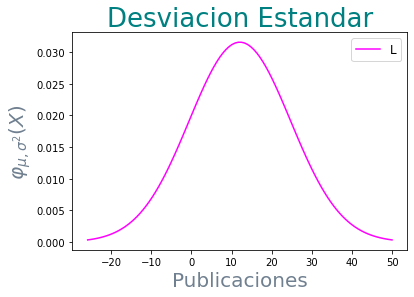

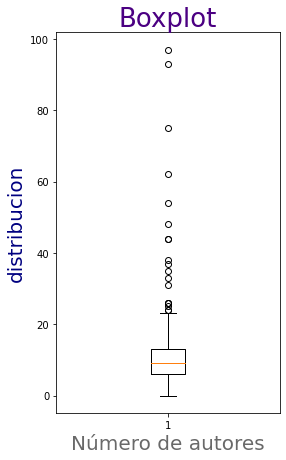

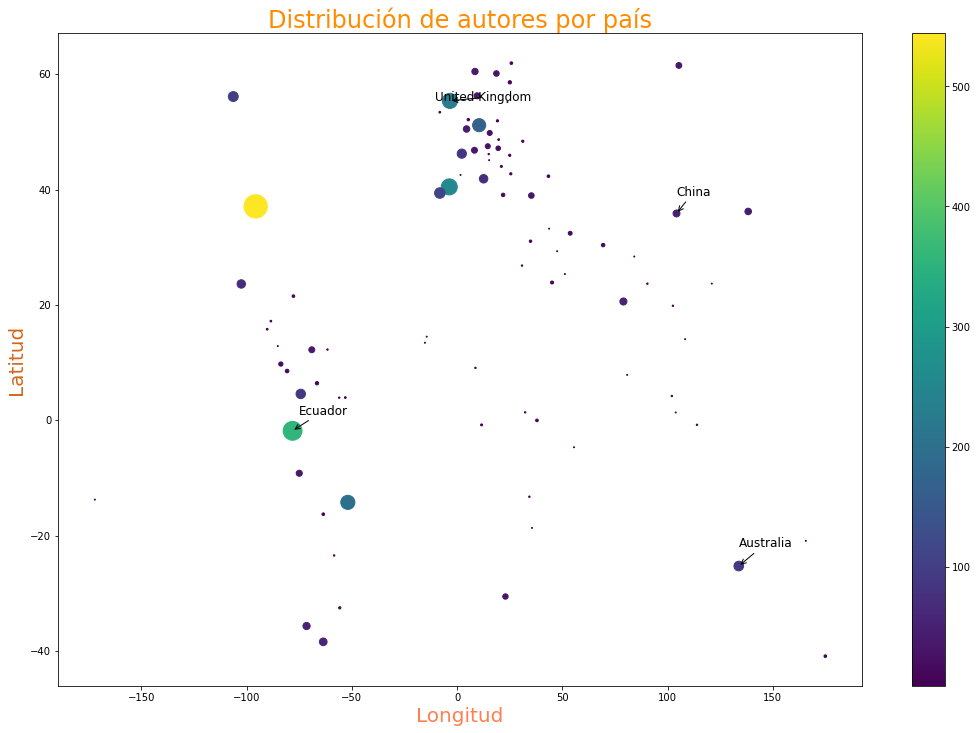

In [17]:
# Escriba aquí su código para el ejercicio 4
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import csv as csv
#Distribucion normal de años
j = year.iloc[:,1]
repeticiones = {}
for n in j:
    if n in repeticiones :
        repeticiones[n] += 1
    else:
        repeticiones[n] = 0

print('articulos por año:',repeticiones)

o = pd.Series(j)
h = list(set(o))
a=o
n=h
h=[0]*len(n)
k=0
for elem in n:
    d=0
    for med in a:
        if elem == str(med):
            d=d+1
    h[k]=d
    k=k+1
print ('media Articulos:',h)
mean = np.average(h)
print ('Prom: ',mean)
stan = np.std(h)
print ('DvE: ',stan)
p = np.linspace(mean - 3*stan, mean + 3*stan, 100)
sigma = stan
label = '$\mu = %.1f, \ \sigma^2=%.1f$' %(mean, stan)
y_norm = stats.norm.pdf(p, mean, sigma)
plt.plot(p, y_norm, c = 'magenta', label = 'desviacion estandar')
plt.xlabel('Publicaciones',fontsize = 20,c = 'slategray')
plt.ylabel('$φ_{μ,σ^2}(X)$',fontsize = 20,c = 'slategray')
plt.title('Desviacion Estandar',fontsize = 26,c = 'teal')
plt.legend('Leyendas')
plt.show()
#Para realizar el Boxplot
r = Autores.iloc[:,1]
d = pd.Series(r)
d1 = d.tolist()
d1.pop(79) 
fig = plt.figure(1, figsize=(4, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(d1)
plt.xlabel('Número de autores',fontsize = 20,c = 'dimgrey')
plt.ylabel('distribucion', fontsize = 20,c = 'navy')
plt.title('Boxplot',fontsize = 26,c = 'indigo')
plt.show()
#Grafico de nubes

se= Pais.iloc[:,0]
su=pd.Series(se)
ba = Pais.iloc[:,1]
sa = pd.Series(ba)
s = sa.tolist()
coordinates={}
with open('data/coordenates_paises.txt') as f:
    csvr = csv.DictReader(f)
    for row in csvr:
        coordinates[row['name']] = [float(row['latitude']), 
                                       float(row['longitude'])]
conteo_paises = Pais.groupby(['Country']).sum()
                          
longitud = [] 
latitud = []
counts = s
for z in su:
    latitud.append(coordinates[z][0])
    longitud.append(coordinates[z][1])
plt.figure()
plt.scatter(longitud, latitud, s = counts, c= counts)
plt.colorbar()
plt.xlabel('Longitud')
plt.ylabel('Latitud')

ard = dict(arrowstyle="->")
plt.annotate('Ecuador', xy = (-78.183406, -1.831239), 
               xytext = (-75.25, 1), arrowprops = ard)
plt.annotate('China', xy = (104.195397, 35.86166), 
               xytext = (104.195397, 39), arrowprops= ard)
plt.annotate('United Kingdom', xy = (-3.435973, 55.378051), 
               xytext = (-10.435973, 55.378051), arrowprops= ard)
plt.annotate('Australia', xy = (133.775136, -25.274398), 
               xytext = (133.775136, -22), arrowprops= ard)

params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
plt.xlabel('Longitud', fontsize = 20, c='coral')
plt.ylabel('Latitud', fontsize = 20,c='chocolate')
plt.title('Distribución de autores por país',fontsize = 24,c = 'darkorange')
plt.show()

## Ejercicio 5 [1 punto]

Interprete los resultados del **ejercicio 4**

**Para grafica distribucion estandar**

La distribucion en la grafica no se ve muy dispersa, es decir, se encuentran cerca de la media.

**Para grafica Boxplot**.
el grafico no da a enteneder que la media de los datos dados se encuentran en cerca del 10 eso nos demuestra que la media obtenida esta correcta. Esta grafica tambien nos indica que existe datos que se encuentran alejados de la media, incluso puede llegar hasta los 100 distribuciones.

**Para mapa mundi**

Esta grafica no da a entender que de los cuatro paises escogidos Ecuador presenta un mayor numero de aportaciones o autores, le sigue Reino Unido con algo más de 200 autores, luego Australia y finalmente China.


## Ejercicio 6 [2 puntos]

Para algún gen de interés, realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de la data tipo ```genbank``` utilizando los diez primeros IDs de accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Interprete el árbol del paso 4. 

"C:\Program Files (x86)\ClustalW2\clustalw2.exe" -infile=data/sequence.fasta


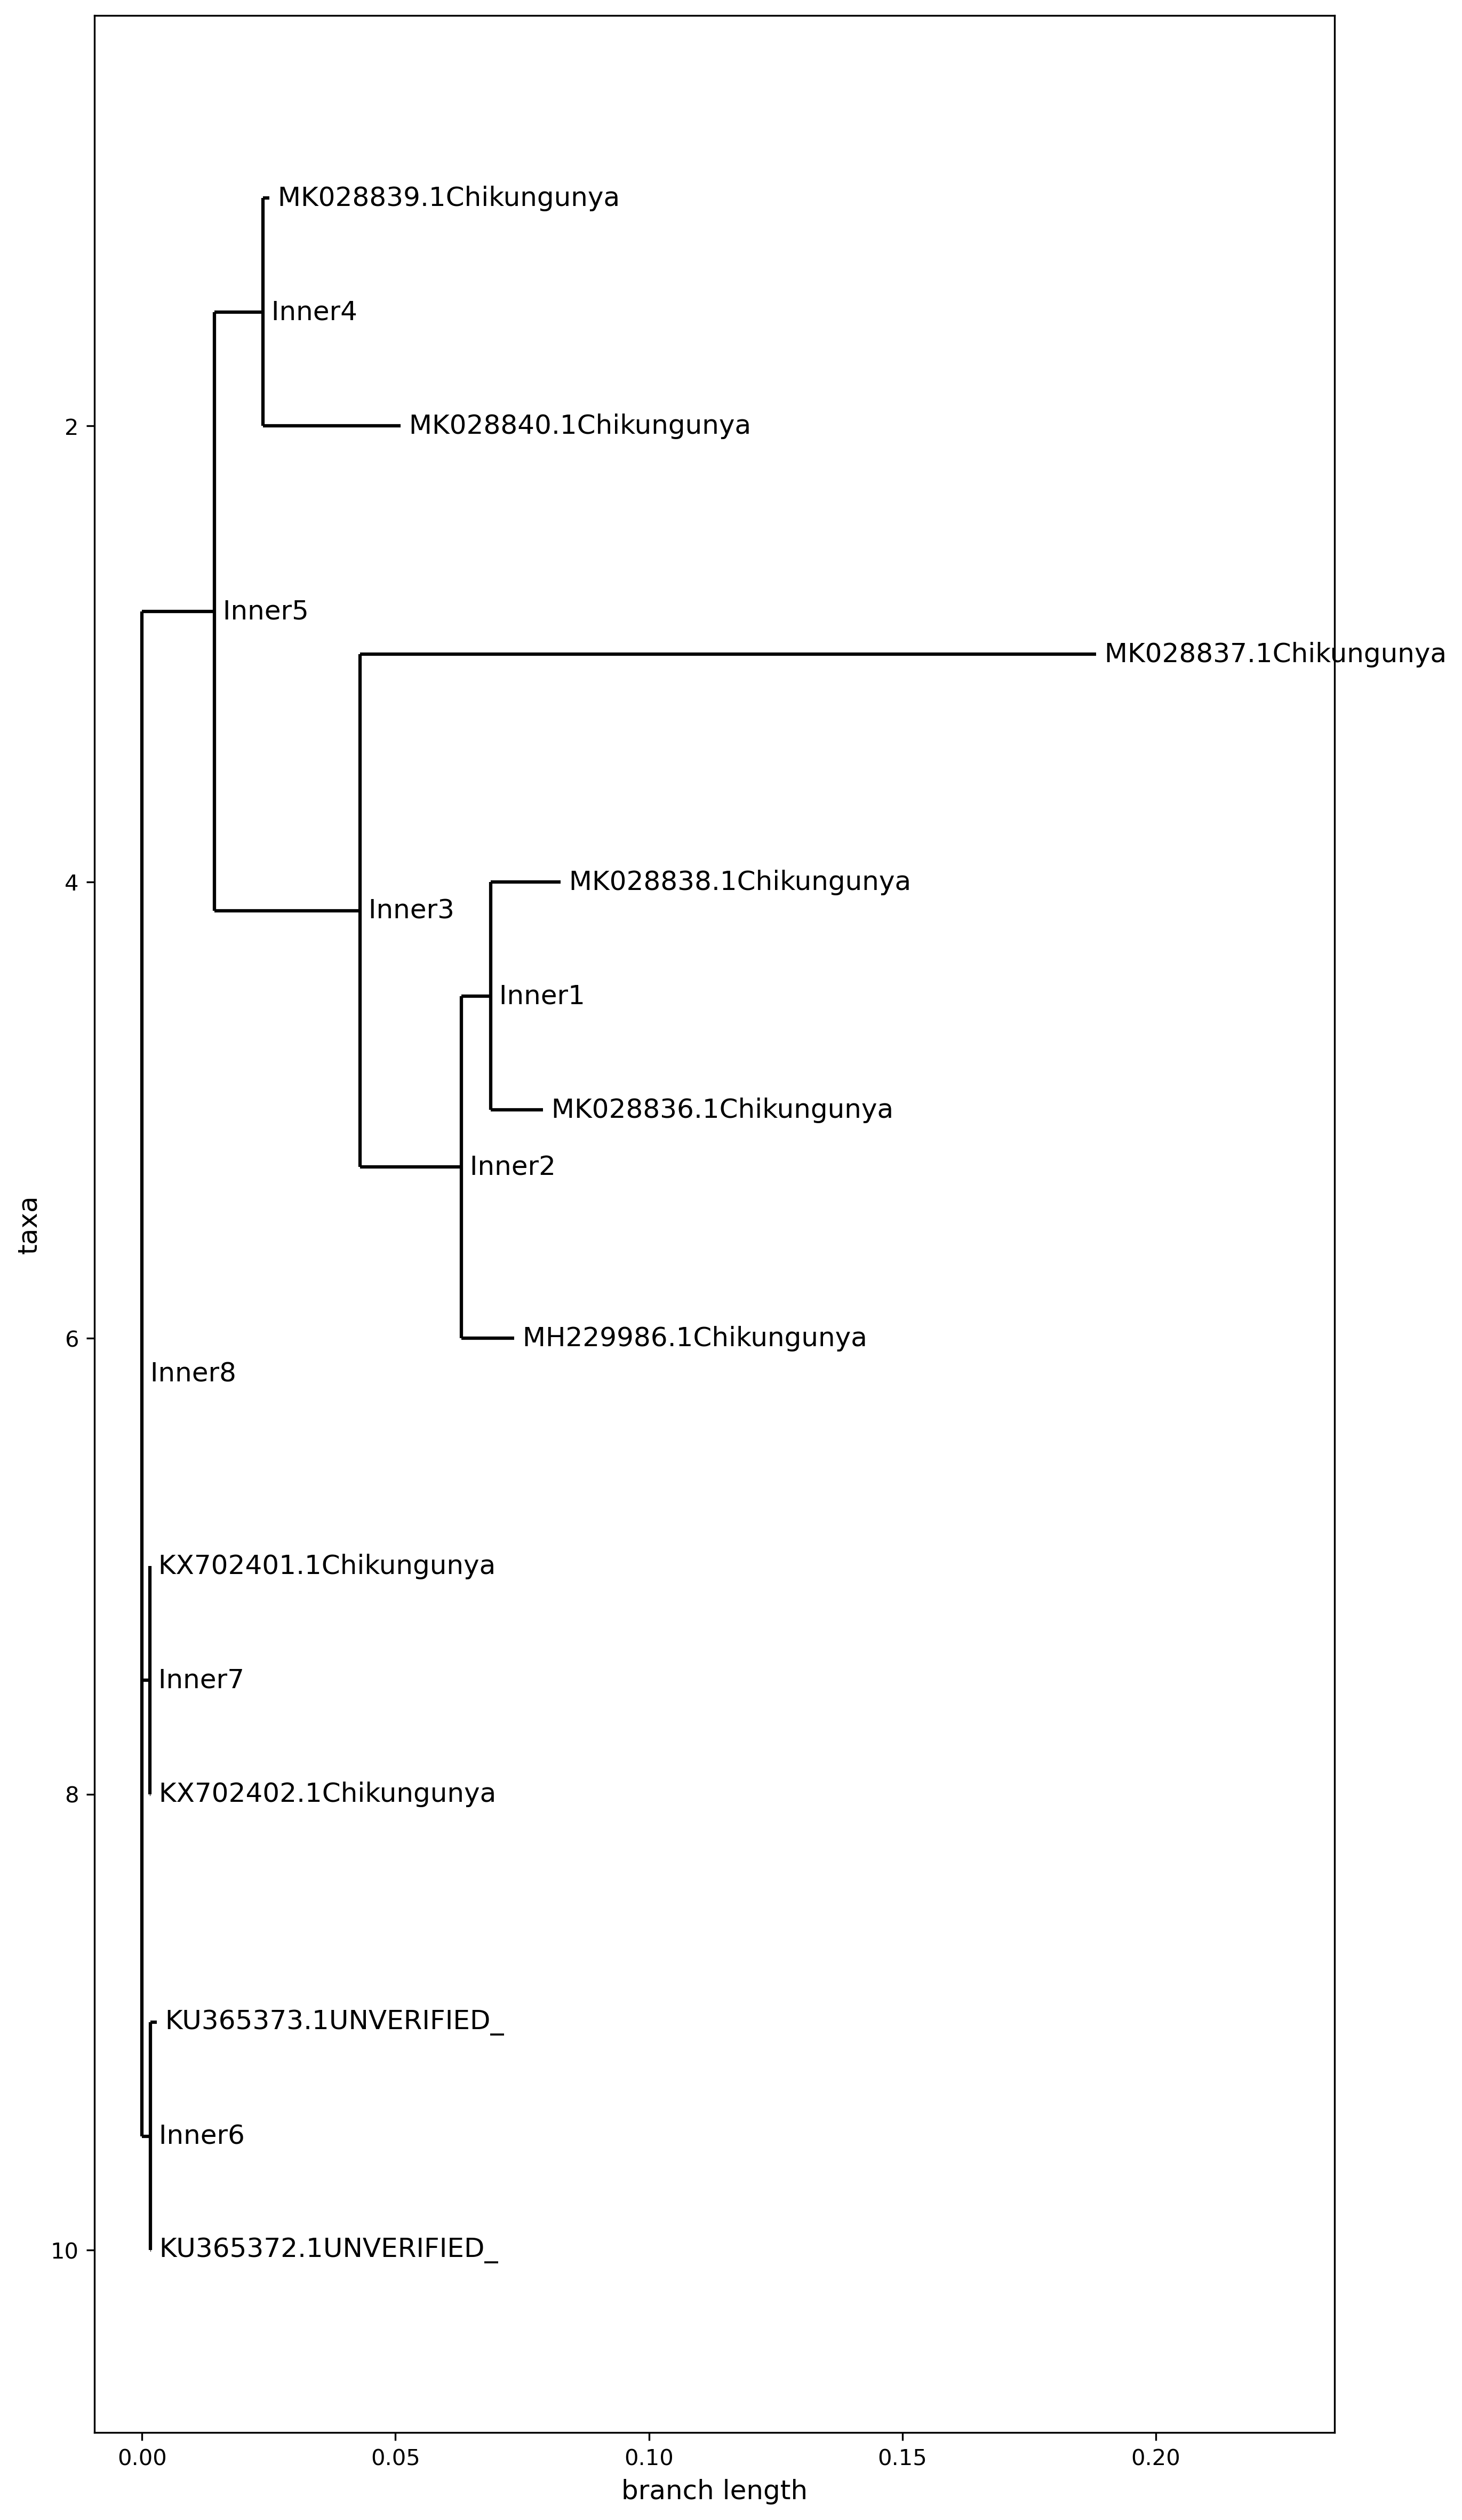

In [14]:
# Escriba aquí su código para el ejercicio 6
from IPython.core.display import Image
from Bio.Seq import Seq
from Bio.SeqUtils import GC

from reportlab.lib import colors
from reportlab.lib.units import cm
from Bio.Graphics import GenomeDiagram
from Bio import SeqIO
from Bio.SeqFeature import SeqFeature, FeatureLocation

# Filogenia
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio import AlignIO

# Proteómica
from Bio.PDB import *
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqUtils.ProtParam import ProtParamData
import nglview as nv
import ipywidgets
import warnings
warnings.filterwarnings('ignore')
import Bio
from Bio import Entrez
from Bio import Entrez
import re
from Bio.Align.Applications import ClustalwCommandline
import os
import matplotlib
import matplotlib.pyplot as plt

with open("data/sequence.seq","r") as archivo:
    b=archivo.read()
    c=b.split('\n')
    a=0
    ListID=[]
    for line in c:
        if a != 10:
            ListID.append(line)
            a=a+1
listasf = []
Entrez.email = "johanna.paez@est.ikiam.edu.ec" 
ofile=open('data/sequence.gb','w')
with Entrez.efetch( db="nucleotide", rettype="gb", retmode="text", id= ListID) as handle: 
    for seq_record in SeqIO.parse(handle, "gb"): 
        ofile.write(">"+str(seq_record.id)+str(seq_record.description[:50])+'\n')
        ofile.write(str(seq_record.seq)+'\n')
        ofile.write('\n')
ffile=open('data/sequence.fasta','w')
with open("data/sequence.gb",'r') as genbank:
    c=genbank.read()
    for line in c:
        ffile.write(str(line))

from Bio.Align.Applications import ClustalwCommandline
import os
clustalw_exe = r"C:\Program Files (x86)\ClustalW2\clustalw2.exe"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile = "data/sequence.fasta")
assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
stdout, stderr = clustalw_cline()
print(clustalw_cline)
#print(clustalw_cline)
ClustalAlign = AlignIO.read("data/sequence.aln", "clustal")
#print(ClustalAlign)
#with open("Data/SequenceD.aln","r") as aln: 
 #   alignment = AlignIO.read(aln,"clustal")
    
#with open("data/sharks.aln","r") as aln: 
 #   alignment = AlignIO.read(aln,"clustal")
# Inicializar la calculadora de Distancias y del modelo 
from Bio.Phylo.TreeConstruction import DistanceCalculator 
calculator = DistanceCalculator('identity')
# Matriz de Distancias 
distance_matrix = calculator.get_distance(ClustalAlign)
#print(distance_matrix)


# Inicializar el constructor del arbol ( Tree Constructor )
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)
# Construir el arbol 
Chyku_tree = constructor.build_tree(ClustalAlign)
Chyku_tree.rooted = True
# Guardar el arbol 
Phylo.write(Chyku_tree, "data/Chyku_tree.xml", "phyloxml")
Chyku_tree = Phylo.read(file="data/Chyku_tree.xml", format= "phyloxml")

# Make a better looking tree using the features of matplotlib 

fig = plt.figure(figsize=(10, 20), dpi=300) # create figure & set the size 
matplotlib.rc('font', size=12)              # fontsize of the leaf and node labels 
matplotlib.rc('xtick', labelsize=10)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=10)       # fontsize of the tick labels
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(Chyku_tree, axes=axes)
fig.savefig("data/Chyku_cladogram")

## **Escriba aquí la interpretación del árbol**

La grafica nos permite observa que las especies unidas en el nodo interno 6 y 7 son las más alejadas de la familia de los Chikungunya, a demás de que lo que se encuentran en el Inner 6 aun no se han verificado todavia. Siguiendo  la ruta nos encontramos con una tercera ramificacion siendo separada nuevamente en dos grupos esta vez no tan lejanos entre ellos tomando el nombre de MK.  

## Ejercicio 7 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada

3. Cree un directorio de nombre ```data``` donde deben estar guardado la data utilizada 
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 6), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado .....  
```